Для начала зададим несколько основных функций, которые в дальнейшем будем использовать.

Функция рассчитывающая входное сопротивление:

In [629]:
def InputImp(Z_n,DZ):
   return W*(Z_n + 1j*tan(2*pi*DZ))/(1 + 1j*Z_n*tan(2*pi*DZ))

Функция рассчитывающая $K_{бв}$ и $K_{св}$:

In [630]:
def  CalcKBV(Z_n, W):
    Gamma = (Z_n - W)/(Z_n + W)
    aG = abs(Gamma)
    Kbv = (1-aG)/(1+aG)
    if (Kbv == 0):
        Ksv = 0
        print("Коэффициент отражения |Г| = ", round(aG,3))
        print("Коэффициент бегущей волны Кбв = ", round(Kbv,3))
        print("Коэффициент стоящей волны Ксв = бесконечности")
    else:
        Ksv = 1/Kbv
        print("Коэффициент отражения |Г| = ", round(aG,3))
        print("Коэффициент бегущей волны Кбв = ", round(Kbv,3))
        print("Коэффициент стоящей волны Ксв = ", round(Ksv,3))

Функция строящая массивы для напряжений и токов, а так же массив zl который является отсчетами $\lambda$

In [631]:
def CalcEpr(U_n,I_n):
    N=1001
    L=2*Lmbd
    dl = L/(N-1)
    #Заполним массивы нулями, чтобы убедится что они будут пустыми
    zl = np.zeros(N)
    I = np.zeros(N)
    U = np.zeros(N)

    for i in range(0,N):
        zl[i] = i*dl
        I[i] = abs(I_n*cos(B*zl[i])+1j*(U_n/W)*sin(B*zl[i]))
        U[i] = abs(U_n*cos(B*zl[i])+1j*I_n*W*sin(B*zl[i]))
    return U,I,zl

Функция поиска ближайшей пучности или напряжения:

In [632]:
def SearchUmax():
    if (U[0]>U[1]):
        Umax=99
        for index, i in enumerate(U):
            if Umax>i:
                Umax=i
            if Umax<i:
                break
    else:
        Umax=0
        for index, i in enumerate(U):
            if Umax<i:
                Umax=i
            if Umax>i:
                break
    print("Расстояние до пучности или узла будет равно : ",zl[index-1])

# Решение задачи №1

Условиями задачи являются:
Линия с волновым сопротивлением $p$ нагружена на активное сопротивление $R_{н}$ (или реактивное сопротивление $X_{н}$). Нарисовать графии эпюр распределениея амплитуд напряжения и тока вдоль линии, указав точное расположение их пучностей и узлов относительно нагрузки и соотношение амплитуд в них. Определить КБВ в линии передачи и входное сопротивление отрезка нагруженной линии длинной $\Delta Z$

## Дано: 
$X_{н} = 1.8*p$;
$\Delta Z = \lambda/4$

In [633]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


W = 50
X_n = W * -1.8
R_n = W * 0
Z_n = R_n + 1j*X_n

Lmbd = 1
DZ = Lmbd/4

print("Значение Z нагрузки будет равно Zн=",R_n,"+i",X_n)

Значение Z нагрузки будет равно Zн= 0 +i -90.0


In [634]:
B = (2*pi)/Lmbd
U_n = 3
I_n = U_n/Z_n

In [635]:
Zin = InputImp(Z_n,DZ)
print("Zвх=",round(Zin.real,3),"+i", round(Zin.imag,3))

Zвх= 0.0 +i 0.556


Мы знаем что выходное сопротивление будет равно $Z_{\text{вх}}=Zin

In [636]:
CalcKBV(Z_n,W)

Коэффициент отражения |Г| =  1.0
Коэффициент бегущей волны Кбв =  0.0
Коэффициент стоящей волны Ксв = бесконечности


In [637]:
U, I, zl = CalcEpr(U_n,I_n)

Z_in = U[0]/I[0]
print("Значение входного сопротивления Zвх=",round(Z_in,3))

Значение входного сопротивления Zвх= 90.0


Создадим функцию которая позволит нам рисовать эпюры напряжений, при этом нагрузка будет слева.

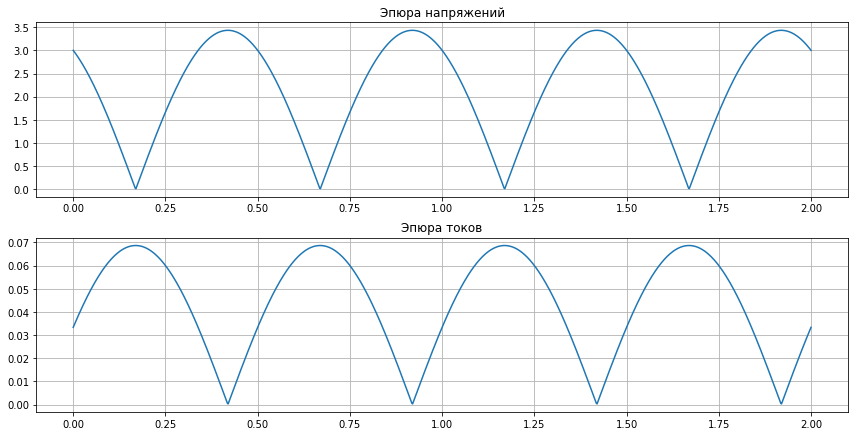

In [638]:
fig, axes = plt.subplots(2,1,figsize=(12,6))

#h_pad - совокупное расстояние по вертикали между subplots.
plt.tight_layout(h_pad = 2)

#Установим наименования областей
axes[0].set_title(u'Эпюра напряжений')
axes[1].set_title(u'Эпюра токов')

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)  

axes[0].plot(zl,U)
axes[1].plot(zl,I)
plt.show()

In [639]:
SearchUmax()

Расстояние до пучности или узла будет равно :  0.17


# Задача №2
Согласовать линию передачи нагруженную на комплексное сопротивление с помощью четверь волнового трансформатора.
Найти сопротивление входа трансфыорматора и его волновое сопротивление.
Сопротивление нагрузки будет равно $Z_{н}=(2-i0.5)\rho$

In [640]:
X_n = W * -0.5
R_n = W * 2
Z_n = R_n + 1j*X_n
U_n = 3
I_n = U_n/Z_n

Далее определям $Z_{вх}$:

In [641]:
Zin = InputImp(Z_n,DZ)
print("Zвх=",round(Zin.real,3),"+i", round(Zin.imag,3))

Zвх= 0.471 +i 0.118


Так как в месте включения трансформатора в узле реактивная часть сопротивления равна нулю.

$X_{вх}=0$

Отсюда 

$\rho_{тр}=\rho \sqrt{Z_{вх}}$

In [642]:
rho_tr=W*sqrt(Zin.real)
print("Сопротивление трансформатора будет равно : ",round(rho_tr,3))

Сопротивление трансформатора будет равно :  34.3


Точка включения трансформатора определяется расстоянием до ближайшей пучности или узла, следовательно необходимо это найти, строим эпюры.

In [643]:
CalcKBV(Z_n,W)

Коэффициент отражения |Г| =  0.368
Коэффициент бегущей волны Кбв =  0.462
Коэффициент стоящей волны Ксв =  2.163


In [644]:
U,I,zl=CalcEpr(U_n,I_n)#Вызываем функцию рассчитывающая функции тока и напряжения

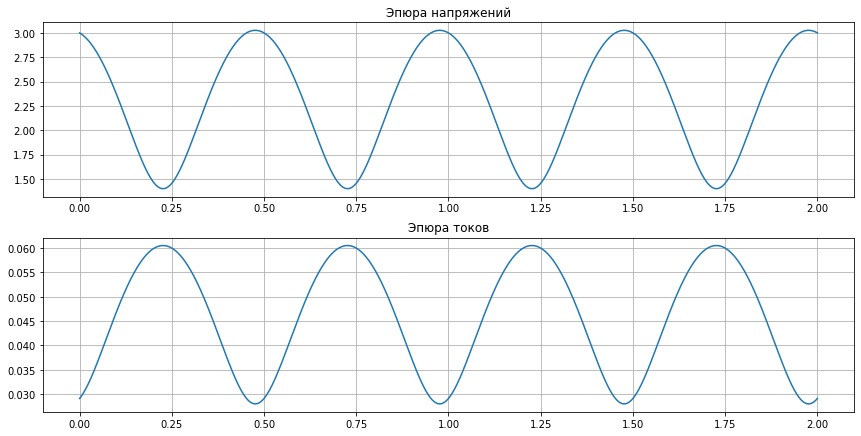

In [645]:
#print(plt.style.available)
#plt.style.use('ggplot')
fig, axes = plt.subplots(2,1,figsize=(12,6))

#h_pad - совокупное расстояние по вертикали между subplots.
plt.tight_layout(h_pad = 2)

#Установим наименования областей
axes[0].set_title(u'Эпюра напряжений')
axes[1].set_title(u'Эпюра токов')

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)  

axes[0].plot(zl,U)
axes[1].plot(zl,I)
plt.show()

In [646]:
SearchUmax()

Расстояние до пучности или узла будет равно :  0.226


Расстояние до пучности в данном примере и будет являться длинной трансформатора.

# Задача №3
Длинная линия передачи нагружена на симметричный вибратор. Найти сопротивление вибратора и согласовать линию с помощью четвертьволнового трансформатора.

$\dfrac{2l}{\lambda}=0,5$; $\rho_{в}=200$; $\rho_{л}=100$

In [647]:
l=0.25*Lmbd
rho_v=200
rho_l=100
R_izl=80


Для нахождения сопротивления нагрузки воспользуемся формулами:

$R_{вх}=\dfrac{R_{изл}}{sin^2(\beta l)}$

$X_{вх}=-\rho_{в}ctg(\beta l)$ где $\beta=\dfrac{2\pi}{\lambda}$

In [648]:
R_v=R_izl/pow(sin(B*l),2)
print("Значение входного сопротивления : ",round(R_v,3))

Значение входного сопротивления :  80.0


In [649]:
X_v=-rho_v*pow(tan(B*l),-1)
print("Значение входного сопротивления реактивного : ",round(X_v,3))

Значение входного сопротивления реактивного :  -0.0


In [650]:
Z_in = round(R_v,3) + 1j*round(X_v,3)
print(Z_in)

(80+0j)


Нормируем $Z_{вх}$ к $\rho_{в}$

In [651]:
print("Zвх = ",round(R_v/rho_l,3),"+j",round(X_v/rho_l,3))

Zвх =  0.8 +j -0.0


In [652]:
X_n = W * round(Z_in.imag/rho_l,1)
R_n = W * round(Z_in.real/rho_l,1)

Z_n = R_n + 1j*X_n
print(Z_n)

(40+0j)


In [653]:
CalcKBV(Z_n,W)

Коэффициент отражения |Г| =  0.111
Коэффициент бегущей волны Кбв =  0.8
Коэффициент стоящей волны Ксв =  1.25


In [654]:
U_n = 3
I_n = U_n/Z_n
U,I,zl=CalcEpr(U_n,I_n)#Вызываем функцию рассчитывающую функции тока и напряжения

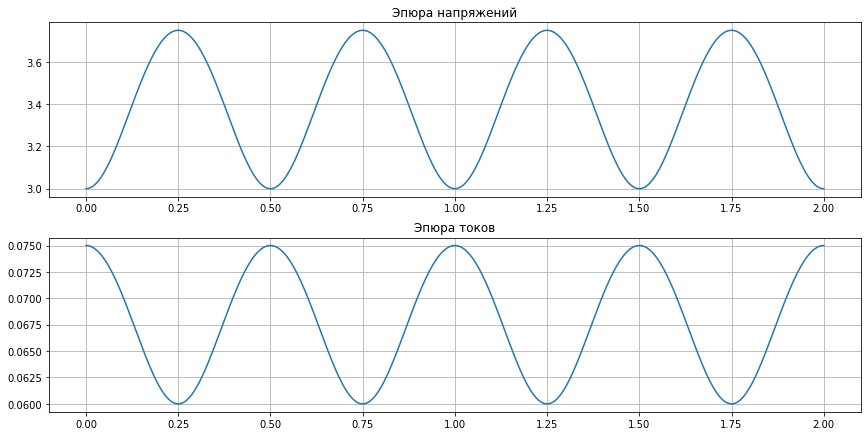

In [655]:
#print(plt.style.available)
#plt.style.use('ggplot')
fig, axes = plt.subplots(2,1,figsize=(12,6))

#h_pad - совокупное расстояние по вертикали между subplots.
plt.tight_layout(h_pad = 2)

#Установим наименования областей
axes[0].set_title(u'Эпюра напряжений')
axes[1].set_title(u'Эпюра токов')

# Нарисуем в каждом subplot линию сетки
for ax in fig.axes:
    ax.grid(True)  

axes[0].plot(zl,U)
axes[1].plot(zl,I)
plt.show()

In [656]:
SearchUmax()

Расстояние до пучности или узла будет равно :  0.25


Соответственно точка включения нагрузки и трансформатора находится в узле напряжения и будет распологаться по такому расстоянию к генератору.

In [657]:
rho_tr=rho_l*sqrt(Z_in.real/rho_l)
print("Сопротивление трансформатора :",round(rho_tr,3),"[Ом]")

Сопротивление трансформатора : 89.443 [Ом]
